In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Bank-Customer-Churn.csv")
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


In [3]:
df.drop(['RowNumber','CustomerId','Surname'],inplace=True,axis=1)

In [4]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


In [5]:
df.dtypes

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [6]:
for column in df:
    print(f"{column} : {df[column].unique()}")

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [7]:
df['Gender'].replace({'Male':1 , 'Female':0}, inplace=True)

C:\Users\more6\AppData\Local\Temp\ipykernel_24072\1843350206.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Male':1 , 'Female':0}, inplace=True)
C:\Users\more6\AppData\Local\Temp\ipykernel_24072\1843350206.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'].r

In [8]:
df1 = pd.get_dummies(df, columns=['Geography','Card Type'], drop_first=True)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Gender              10000 non-null  int64  
 2   Age                 10000 non-null  int64  
 3   Tenure              10000 non-null  int64  
 4   Balance             10000 non-null  float64
 5   NumOfProducts       10000 non-null  int64  
 6   HasCrCard           10000 non-null  int64  
 7   IsActiveMember      10000 non-null  int64  
 8   EstimatedSalary     10000 non-null  float64
 9   Exited              10000 non-null  int64  
 10  Complain            10000 non-null  int64  
 11  Satisfaction Score  10000 non-null  int64  
 12  Point Earned        10000 non-null  int64  
 13  Geography_Germany   10000 non-null  bool   
 14  Geography_Spain     10000 non-null  bool   
 15  Card Type_GOLD      10000 non-null  bool   
 16  Card 

In [10]:
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned', 'Geography_Germany',
       'Geography_Spain', 'Card Type_GOLD', 'Card Type_PLATINUM',
       'Card Type_SILVER'],
      dtype='object')

In [11]:
true_false_col = ['Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER']
for col in true_false_col:
    df1[col] = df1[col].astype(int)

In [12]:
df1["HasCrCard"] = df1["HasCrCard"].astype(bool).astype("category")
df1["IsActiveMember"] = df1["IsActiveMember"].astype(bool).astype("category")
df1["Gender"] = df1["Gender"].astype(bool).astype("category")
df1["Geography_Germany"] = df1["Geography_Germany"].astype(bool).astype("category")
df1["Geography_Spain"] = df1["Geography_Spain"].astype(bool).astype("category")


In [13]:
df1.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,False,42,2,0.00,1,True,True,101348.88,1,1,2,464,False,False,0,0,0
1,608,False,41,1,83807.86,1,False,True,112542.58,0,1,3,456,False,True,0,0,0
2,502,False,42,8,159660.80,3,True,False,113931.57,1,1,3,377,False,False,0,0,0
3,699,False,39,1,0.00,2,False,False,93826.63,0,0,5,350,False,False,1,0,0
4,850,False,43,2,125510.82,1,True,True,79084.10,0,0,5,425,False,True,1,0,0
5,645,True,44,8,113755.78,2,True,False,149756.71,1,1,5,484,False,True,0,0,0
6,822,True,50,7,0.00,2,True,True,10062.80,0,0,2,206,False,False,0,0,1
7,376,False,29,4,115046.74,4,True,False,119346.88,1,1,2,282,True,False,0,0,0
8,501,True,44,4,142051.07,2,False,True,74940.50,0,0,3,251,False,False,1,0,0
9,684,True,27,2,134603.88,1,True,True,71725.73,0,0,3,342,False,False,1,0,0


In [14]:
cat_col = df1.select_dtypes(include="category").columns


In [15]:
for col in cat_col:
    df1[col] = df1[col].astype("int")


In [33]:
df1.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,-0.326221,0,0.293517,2,-1.225848,1,1,1,0.021886,1,1,2,-0.630839,0,0,0,0,0
1,-0.440036,0,0.198164,1,0.117350,1,0,1,0.216534,0,1,3,-0.666251,0,1,0,0,0
2,-1.536794,0,0.293517,8,1.333053,3,1,0,0.240687,1,1,3,-1.015942,0,0,0,0,0
3,0.501521,0,0.007457,1,-1.225848,2,0,0,-0.108918,0,0,5,-1.135457,0,0,1,0,0
4,2.063884,0,0.388871,2,0.785728,1,1,1,-0.365276,0,0,5,-0.803472,0,1,1,0,0
5,-0.057205,1,0.484225,8,0.597329,2,1,0,0.863650,1,1,5,-0.542310,0,1,0,0,0
6,1.774174,1,1.056346,7,-1.225848,2,1,1,-1.565487,0,0,2,-1.772869,0,0,0,0,1
7,-2.840488,0,-0.946079,4,0.618019,4,1,0,0.334854,1,1,2,-1.436457,1,0,0,0,0
8,-1.547141,1,0.484225,4,1.050820,2,0,1,-0.437329,0,0,3,-1.573678,0,0,1,0,0
9,0.346319,1,-1.136786,2,0.931463,1,1,1,-0.493230,0,0,3,-1.170869,0,0,1,0,0


In [39]:
df_raw = df1.copy()


In [40]:
X = df_raw.drop("Exited", axis=1)
y = df_raw["Exited"]

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=5,
    stratify=y
)


In [42]:
scale_cols = [
    "CreditScore",
    "Age",
    "Balance",
    "EstimatedSalary",
    "Point Earned"
]

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [45]:
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])
# fit on train but transform on both

In [46]:
X_train.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
8839,-0.455171,1,0.097680,1,1.106538,2,1,1,1.159422,0,3,0.607932,1,0,0,0,1
7745,0.101615,1,0.097680,5,0.898174,2,1,1,-1.070783,0,4,-0.204589,0,0,1,0,0
3843,1.369848,1,-0.093148,1,-1.212947,3,1,1,-0.348561,1,3,-0.320029,0,1,0,0,1
8652,1.277050,0,0.383921,1,0.559964,1,0,0,0.150610,0,4,-0.040309,0,1,1,0,0
1309,-0.609833,1,-0.856457,8,0.787672,2,0,0,-0.866341,0,2,0.195012,0,1,0,0,0


In [47]:
X_test.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
3957,0.070682,0,-0.093148,5,0.770251,1,0,0,-0.926781,1,1,-0.981589,1,0,0,0,1
2947,1.277050,1,-0.283975,7,0.448469,1,0,1,0.327908,0,1,-1.469990,0,0,0,0,1
8240,1.442023,1,1.051816,8,0.732887,1,1,1,1.330585,1,4,-1.128109,1,0,1,0,0
371,-0.104602,0,3.437157,1,0.490445,2,0,1,0.231251,0,2,0.430332,1,0,0,1,0
4800,0.410940,1,0.002266,6,-1.212947,2,1,0,1.052645,0,1,-0.395509,0,0,0,1,0


In [48]:
#modelling

In [49]:
#baseline logistic regression

### Without a baseline: 
##### You don’t know if NN is actually better
##### You can’t justify complexity
##### You can’t explain improvement
##### Logistic Regression = reference point'''

#### “Although it is technically possible to train a neural network after splitting the data, I start with simpler, interpretable models like Logistic Regression to establish a baseline, validate preprocessing, and ensure explainability before moving to more complex models.”

In [50]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    random_state=5
)

log_reg.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,5
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [51]:
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]


In [52]:
#evaluate model
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[1591,    1],
       [   3,  405]])

In [53]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      0.99      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Text(95.72222222222221, 0.5, 'Truth')

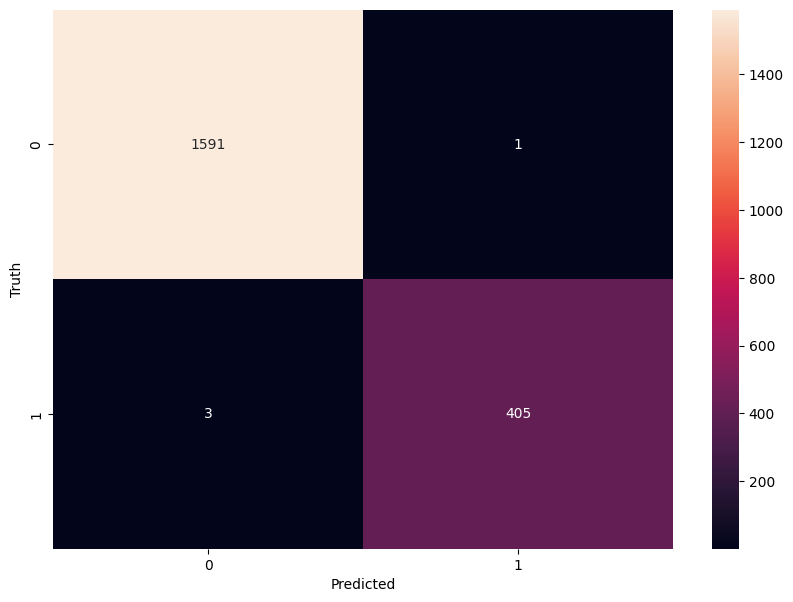

In [54]:
import seaborn as sn

cm= tf.math.confusion_matrix(labels = y_pred , predictions = y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm , annot=True , fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [55]:

#training a random forest model

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=5,
    class_weight="balanced"
)

rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [57]:
y_pred_rf = rf.predict(X_test)
y_pred_rf_proba = rf.predict_proba(X_test)[:, 1]


In [58]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_rf)


array([[1591,    1],
       [   3,  405]])

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      0.99      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Text(95.72222222222221, 0.5, 'Truth')

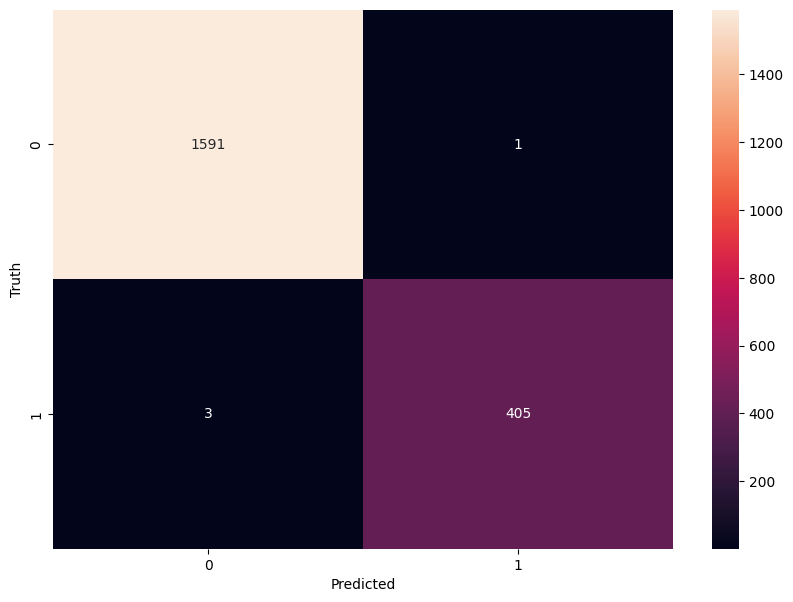

In [61]:
import seaborn as sn

cm= tf.math.confusion_matrix(labels = y_test , predictions = y_pred_rf)

plt.figure(figsize = (10,7))
sn.heatmap(cm , annot=True , fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [62]:
#feature importance
import pandas as pd

feature_importance_rf = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance_rf.head(10)


,Feature,Importance
9,Complain,0.808597
2,Age,0.069789
5,NumOfProducts,0.044339
4,Balance,0.014581
7,IsActiveMember,0.012158
12,Geography_Germany,0.010395
8,EstimatedSalary,0.008209
0,CreditScore,0.008192
11,Point Earned,0.007880
1,Gender,0.004175


In [63]:
# final comparison

In [64]:
from sklearn.metrics import recall_score, roc_auc_score, accuracy_score
import pandas as pd


In [65]:
comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Recall (Churn)": [
        recall_score(y_test, y_pred),
        recall_score(y_test, y_pred_rf)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_pred_proba),
        roc_auc_score(y_test, y_pred_rf_proba)
    ]
})

comparison_df


,Model,Accuracy,Recall (Churn),ROC-AUC
0,Logistic Regression,0.998,0.992647,0.999127
1,Random Forest,0.998,0.992647,0.998940


In [66]:
comparison_df.sort_values(by="Recall (Churn)", ascending=False)


,Model,Accuracy,Recall (Churn),ROC-AUC
0,Logistic Regression,0.998,0.992647,0.999127
1,Random Forest,0.998,0.992647,0.998940


In [67]:
#printing final model choice
best_model = comparison_df.sort_values(
    by="Recall (Churn)", ascending=False
).iloc[0]["Model"]

print(f"Final selected model: {best_model}")


Final selected model: Logistic Regression
